## Plotting regular waves per probe per file to observe amplitude

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
def plot_all_probes(frequency, amplitude,shift):
    data_list = [["time"],["Probe 1"],["Probe 2"],["Probe 3"], ["Probe 4"], ["Probe 5"]]
    time_list = [["time0"],["time1"],["time2"],["time3"],["time4"],["time5"]]
    freq = str(frequency).replace(".","")
    filename = "F" + freq + "A" + str(amplitude)
    with open('Experimental Data-20201218/' + filename + ".txt") as txt:
        rows = txt.readlines()
        for i in range(1,len(data_list)):
            time_period = int(len(rows)/2)
            current = 0
            zeroes = 0
            while zeroes < 2 and time_period < len(rows):
                last = current
                row_list = rows[time_period].strip().split(" ")
                current = float(rows[time_period].strip().split(" ")[i])
                if current == 0 or (current > 0 and last < 0) :
                    zeroes += 1
                if zeroes > 0:
                    data_list[i].append(float(row_list[i]))
                    time_list[i].append(float(row_list[0]))
                time_period += 1

            base = time_list[i][1]
            for j in range(1,len(time_list[i])):
                time_list[i][j] = time_list[i][j] - base
        data_list[0][1:] = time_list[1][1:]
    sine_list = ["Sine wave of same frequency and amplitude"]
    for i in range(1,len(data_list[0])):
        sine_list.append(amplitude *(np.sin(2*np.pi*frequency*(float(data_list[0][i])))))
    plt.figure(figsize=(17,5))
    plt.title("Regular Waves Plot: Frequency: " + str(frequency) + "Hz, Amplitude: " + str(amplitude) + "cm")
    plt.xlabel("time/sec")
    plt.ylabel("wave height/cm")
    plt.plot(data_list[0][1:],sine_list[1:],label=sine_list[0])
    for i in range(1,len(data_list)):
        plt.plot(time_list[i][1:],data_list[i][1:],label=data_list[i][0])
    plt.legend()
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.savefig("graphs/" + filename + "AllProbes.png")
    plt.show()

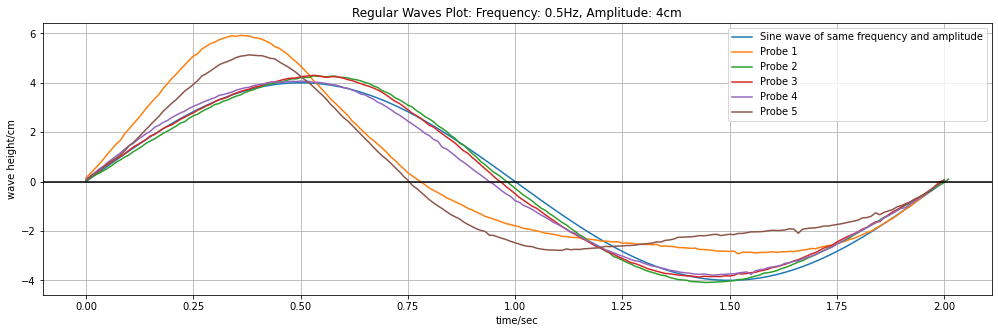

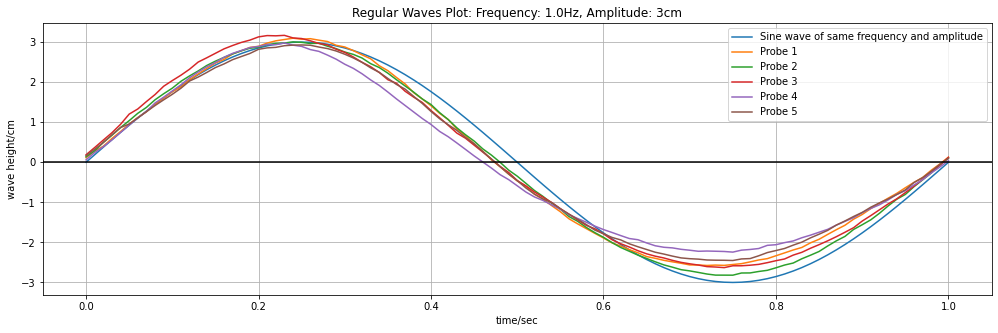

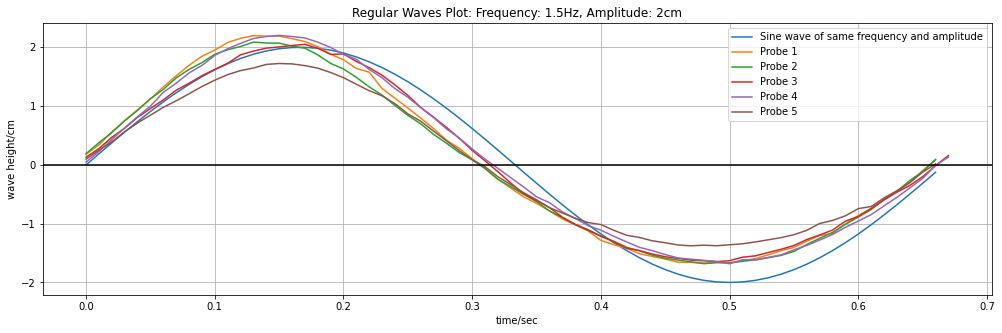

In [165]:
plot_all_probes(0.5,4,0.14)
plot_all_probes(1.0,3,0.91)
plot_all_probes(1.5,2,0.65)
